#   Linear Regression Application

An Insurance company provides Health Insurance to its customers. Various details of
the customers are stored amongst which, age, gender, bmi, children, smoker, and region
are to be considered. The insurance charges born by the company for each of their
customers are also provided. It is required to build a model to predict the insurance
charges for a customer given the features, age, gender, bmi, children, smoker, and
region

1. Give a formal description of this application in terms of Task, Experience, and
Performance. (Make it a well posed problem)

a)Task(T): To to predict the insurance charges for a customer based on features


b)Experience(E):Insurance charges born by the company for each of their customers based on features like bmi,region,age etc


C)Performance (P):Prediction Accuracy, quality of the learned model is to see on how long term the predictions given by the model are accurate

## 2. Do exploratory data analysis on the data. (As given in Lab-0)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pandas import read_csv
path='health_insurance.csv'
data=read_csv(path)
data=data.rename(columns={"sex": "gender"})
print (data.shape)


(1338, 7)


In [3]:
data

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
description = data.describe()
print(description)

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [5]:
print(data.groupby('charges').size())

charges
1121.87390     1
1131.50660     1
1135.94070     1
1136.39940     1
1137.01100     1
              ..
55135.40209    1
58571.07448    1
60021.39897    1
62592.87309    1
63770.42801    1
Length: 1337, dtype: int64


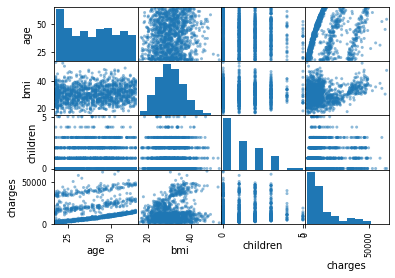

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

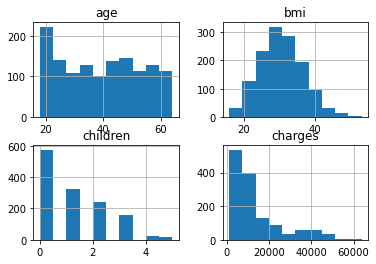

In [7]:
data.hist()

# 3. Do the required preprocessing on the dataset to make it suitable to apply gradient descent algorithm.

In [8]:
cleanup_data = {"gender":     {"male": 1, "female": 0},
                "smoker": {"yes": 1, "no": 0},
                "region": {"southwest": 1,"southeast" :2 ,"northwest" : 3 ,"northeast" : 4}}

In [9]:
data.isnull().values.any()

False

In [10]:
data = data.replace(cleanup_data)
data

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,4,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


3.Do the required preprocessing on the dataset to make it suitable to apply gradient
descent algorithm.


             0    1         2    3    4         5         6
0     0.021739  0.0  0.321227  0.0  1.0  0.000000  0.251611
1     0.000000  1.0  0.479150  0.2  0.0  0.333333  0.009636
2     0.217391  1.0  0.458434  0.6  0.0  0.333333  0.053115
3     0.326087  1.0  0.181464  0.0  0.0  0.666667  0.333010
4     0.304348  1.0  0.347592  0.0  0.0  0.666667  0.043816
...        ...  ...       ...  ...  ...       ...       ...
1333  0.695652  1.0  0.403820  0.6  0.0  0.666667  0.151299
1334  0.000000  0.0  0.429379  0.0  0.0  1.000000  0.017305
1335  0.000000  0.0  0.562012  0.0  0.0  0.333333  0.008108
1336  0.065217  0.0  0.264730  0.0  0.0  0.000000  0.014144
1337  0.934783  0.0  0.352704  0.0  1.0  0.666667  0.447249

[1338 rows x 7 columns]


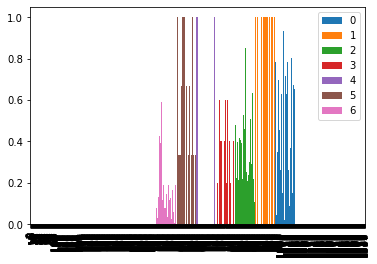

In [11]:
#Plot normalized data
from sklearn import preprocessing
fl_x=data.values.astype(float)
#fl_x=mydataframe[['f1']].values.astype(float) #If specific feature name is to be converted
min_max_scaler=preprocessing.MinMaxScaler()
X_scaled=min_max_scaler.fit_transform(fl_x)
df_normalized=pd.DataFrame(X_scaled)
print(df_normalized)
df_normalized.plot(kind='bar')
plt.show()

# 4.Find the relationship of each feature with the target feature insurance charge by using a scatter plot.


array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='charges', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='charges'>,
        <AxesSubplot:xlabel='charges', ylabel='charges'>]], dtype=object)

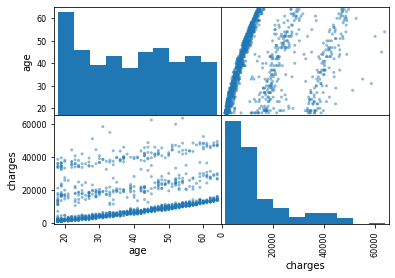

In [12]:
scatter_matrix(data[['age','charges']])

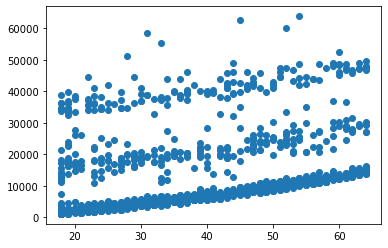

In [13]:
plt.scatter(data['age'],data['charges'])

array([[<AxesSubplot:xlabel='gender', ylabel='gender'>,
        <AxesSubplot:xlabel='charges', ylabel='gender'>],
       [<AxesSubplot:xlabel='gender', ylabel='charges'>,
        <AxesSubplot:xlabel='charges', ylabel='charges'>]], dtype=object)

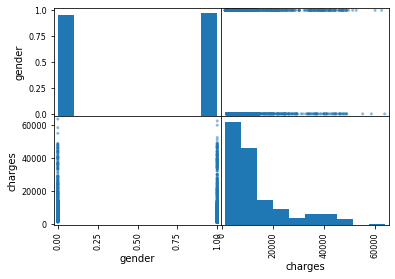

In [14]:
scatter_matrix(data[['gender','charges']])

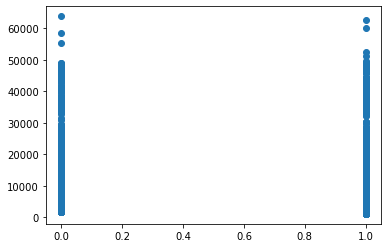

In [15]:
plt.scatter(data['gender'],data['charges'])

array([[<AxesSubplot:xlabel='bmi', ylabel='bmi'>,
        <AxesSubplot:xlabel='charges', ylabel='bmi'>],
       [<AxesSubplot:xlabel='bmi', ylabel='charges'>,
        <AxesSubplot:xlabel='charges', ylabel='charges'>]], dtype=object)

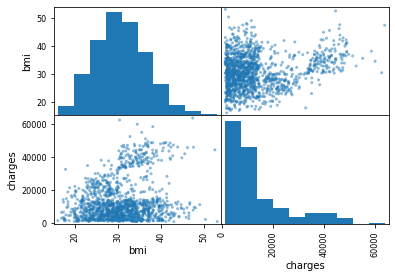

In [16]:
scatter_matrix(data[['bmi','charges']])

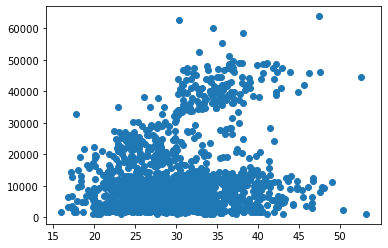

In [17]:
plt.scatter(data['bmi'],data['charges'])

array([[<AxesSubplot:xlabel='children', ylabel='children'>,
        <AxesSubplot:xlabel='charges', ylabel='children'>],
       [<AxesSubplot:xlabel='children', ylabel='charges'>,
        <AxesSubplot:xlabel='charges', ylabel='charges'>]], dtype=object)

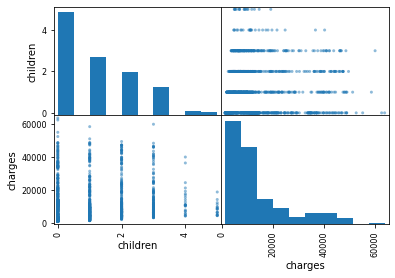

In [18]:
scatter_matrix(data[['children','charges']])

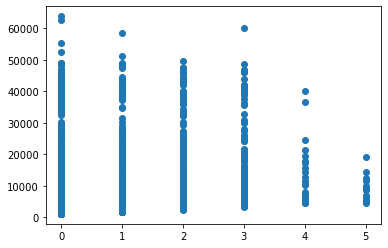

In [19]:
plt.scatter(data['children'],data['charges'])

array([[<AxesSubplot:xlabel='region', ylabel='region'>,
        <AxesSubplot:xlabel='charges', ylabel='region'>],
       [<AxesSubplot:xlabel='region', ylabel='charges'>,
        <AxesSubplot:xlabel='charges', ylabel='charges'>]], dtype=object)

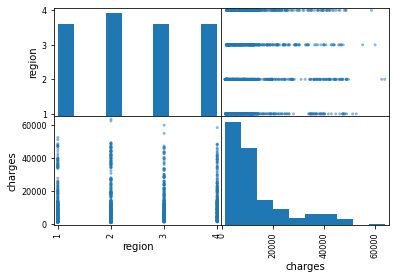

In [20]:
scatter_matrix(data[['region','charges']])

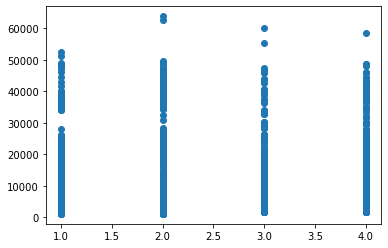

In [21]:
plt.scatter(data['region'],data['charges'])

array([[<AxesSubplot:xlabel='smoker', ylabel='smoker'>,
        <AxesSubplot:xlabel='charges', ylabel='smoker'>],
       [<AxesSubplot:xlabel='smoker', ylabel='charges'>,
        <AxesSubplot:xlabel='charges', ylabel='charges'>]], dtype=object)

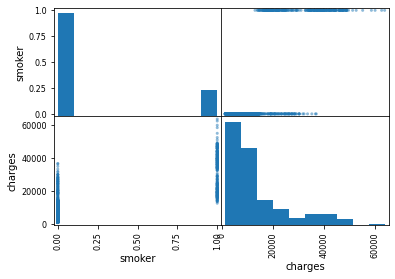

In [22]:
scatter_matrix(data[['smoker','charges']])

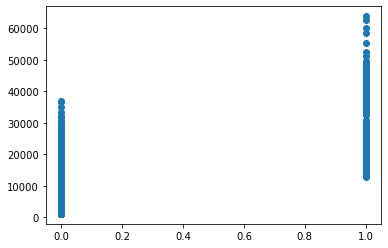

In [23]:
plt.scatter(data['smoker'],data['charges'])

In [24]:

data.corr()

,age,gender,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
gender,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


# 5. Implement linear regression using inbuilt package of python scikit. This will helpto estimate the function f(X)=Y where X is one of the input features and Y is the target feature, insurance charges

In [25]:

X=np.asarray(X_scaled[:,0]).reshape(-1,1)
Y=np.asarray(X_scaled[:,6]).reshape(-1,1)

In [26]:
print(type(X))
print(X.shape)
print(Y.shape)

<class 'numpy.ndarray'>
(1338, 1)
(1338, 1)


In [27]:
#DataSplitting
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.33, random_state=42)

In [28]:
len(X_test)

442

In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test) 

In [30]:
print(regressor.score(X_test, Y_test)) 

0.10133866336919384


## Implement linear regression using inbuilt package of python scikit. This will helpto estimate the function f(X)=Y where X is one of the input features and Y is the target feature, insurance charges

## Q 1: Consider bmi as feature vector

In [31]:

X=np.asarray(X_scaled[:,2]).reshape(-1,1)
Y=np.asarray(X_scaled[:,6]).reshape(-1,1)

In [32]:
#DataSplitting
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.33, random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test) 

In [34]:
print(regressor.score(X_test, Y_test)) 

0.047540318300490436


In [35]:
from sklearn.metrics import mean_squared_error
mae = mean_squared_error(Y_test, Y_pred)
mae

0.035562679995193885

In [36]:
rms = mean_squared_error(Y_test, Y_pred, squared=False)
rms

0.18858069889358742

In [37]:
regressor.coef_

array([[0.22368867]])

In [38]:
regressor.intercept_

array([0.10790194])

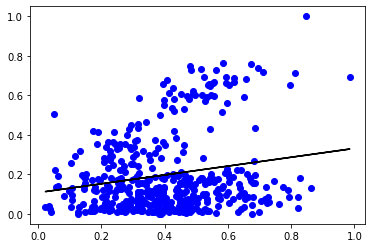

In [39]:
plt.scatter(X_test, Y_test, color ='b') 
plt.plot(X_test,Y_pred, color ='k') 

# 9.Compute the error metrics MSE, RMSE and compare

In [40]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, Y_pred)
mae

0.1486351876442808

In [41]:
from sklearn.metrics import mean_squared_error
mae = mean_squared_error(Y_test, Y_pred)
mae

0.035562679995193885

In [42]:
rms = mean_squared_error(Y_test, Y_pred, squared=False)
rms

0.18858069889358742

In [43]:
regressor.coef_

array([[0.22368867]])

In [44]:
regressor.intercept_

array([0.10790194])

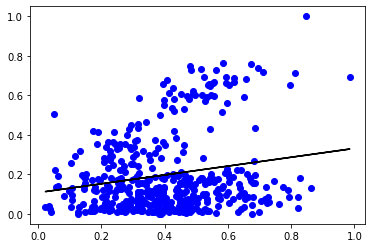

In [45]:
plt.scatter(X_test, Y_test, color ='b') 
plt.plot(X_test,Y_pred, color ='k') 

# 5.Implement gradient descent algorithm with the function prototype
def gradient_descent(alpha, x, y, max_iter=1500):
where alpha is the learning rate, x is the input feature vector. y is the target feature.
Convergence criteria: when no: of iterations exceed max_iter. 

In [46]:
X = np.hstack((np.ones((X_scaled[:,0].size,1)),np.expand_dims(X_scaled[:,0], axis=1)))
Y=np.asarray(X_scaled[:,6])

In [47]:
len(Y)

1338

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.33, random_state=42)

In [49]:
def cost_function(X,Y,theta):
    J=np.sum((X.dot(theta)-Y)**2)/len(Y)
    return J

In [50]:
def gradient_descent(x, y,alpha,theta, max_iter=1500):
    n = len(y)
    cost_history = [0] * max_iter
    for iteration in range(max_iter):
        y_pred = x.dot(theta)
        gradient = x.T.dot(y_pred - y)/n
        theta = theta - alpha*(gradient)
        cost = cost_function(x,y,theta)
        cost_history[iteration] = cost
        if iteration and cost > cost_history[iteration-1]:
            alpha = alpha*0.1
        #print(theta)
    return theta, cost_history

# 7. Vary learning rate from 0.1 to 0.9 and observe the learned parameter

In [51]:
(theta, ch) = gradient_descent(X_train,Y_train,alpha=0.1,theta=np.array([0,0]))
MSE_train=ch[-1]
print('Mean Square Error Of Train:',MSE_train)
print(theta)

Mean Square Error Of Train: 0.034234201285101976
[0.11251195 0.18012354]


In [52]:
(theta, ch) = gradient_descent(X_test,Y_test,alpha=0.1,theta=np.array([0,0]))
MSE_test=ch[-1]
print('Mean Square Error Of Test:',MSE_test)
print(theta)

Mean Square Error Of Test: 0.033455426517312266
[0.09429203 0.20897084]


In [53]:
(theta, ch) = gradient_descent(X_test,Y_test,alpha=0.2,theta=np.array([0,0]))
MSE_test=ch[-1]
print('Mean Square Error Of Test:',MSE_test)
print(theta)

Mean Square Error Of Test: 0.03345542651679052
[0.09429085 0.20897322]


In [54]:
(theta, ch) = gradient_descent(X_test,Y_test,alpha=0.3,theta=np.array([0,0]))
MSE_test=ch[-1]
print('Mean Square Error Of Test:',MSE_test)
print(theta)

Mean Square Error Of Test: 0.033455426516790496
[0.09429084 0.20897322]


In [55]:
(theta, ch) = gradient_descent(X_test,Y_test,alpha=0.4,theta=np.array([0,0]))
MSE_test=ch[-1]
print('Mean Square Error Of Test:',MSE_test)
print(theta)

Mean Square Error Of Test: 0.03345542651679048
[0.09429084 0.20897322]


In [56]:
(theta, ch) = gradient_descent(X_test,Y_test,alpha=0.5,theta=np.array([0,0]))
MSE_test=ch[-1]
print('Mean Square Error Of Test:',MSE_test)
print(theta)

Mean Square Error Of Test: 0.03345542651679046
[0.09429084 0.20897323]


In [57]:
(theta, ch) = gradient_descent(X_test,Y_test,alpha=0.6,theta=np.array([0,0]))
MSE_test=ch[-1]
print('Mean Square Error Of Test:',MSE_test)
print(theta)

Mean Square Error Of Test: 0.03345542651679046
[0.09429084 0.20897323]


In [58]:
(theta, ch) = gradient_descent(X_test,Y_test,alpha=0.7,theta=np.array([0,0]))
MSE_test=ch[-1]
print('Mean Square Error Of Test:',MSE_test)
print(theta)

Mean Square Error Of Test: 0.03345542651679047
[0.09429084 0.20897323]


In [59]:
(theta, ch) = gradient_descent(X_test,Y_test,alpha=0.8,theta=np.array([0,0]))
MSE_test=ch[-1]
print('Mean Square Error Of Test:',MSE_test)
print(theta)

Mean Square Error Of Test: 0.03345542651679046
[0.09429084 0.20897323]


In [60]:
(theta, ch) = gradient_descent(X_test,Y_test,alpha=0.9,theta=np.array([0,0]))
MSE_test=ch[-1]
print('Mean Square Error Of Test:',MSE_test)
print(theta)

Mean Square Error Of Test: 0.03345542651679046
[0.09429084 0.20897323]


# 8.Draw a contour plot of cost function and simulate the steps of gradient descent. 

In [61]:
def gradient_descent(x, y,alpha,theta, max_iter=1500):
    theta_0_hist =[]
    n = len(y)
    cost_history = [0] * max_iter
    for iteration in range(max_iter):
        y_pred = x.dot(theta)
        gradient = x.T.dot(y_pred - y)/n
        theta = theta - alpha*gradient
        cost = cost_function(x,y,theta)
        cost_history[iteration] = cost
        theta_0_hist.append(theta)
        if iteration and cost > cost_history[iteration-1]:
            alpha = alpha*0.1
    return theta_0_hist,cost_history

In [62]:
(theta, cost_history) = gradient_descent(X_test,Y_test,0.01,np.array([0,0]))
theta_list=np.array(theta)


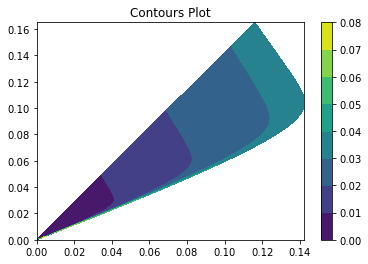

In [63]:
t_a=np.c_[np.zeros((len(theta_list[:,0]),1)),theta_list[:,0]]
t_b=np.c_[np.zeros((len(theta_list[:,1]),1)),theta_list[:,1]]
c_b=np.c_[np.zeros((len(cost_history),1)),cost_history]
fig,ax=plt.subplots(1,1)
cp = ax.contourf(t_a,t_b,c_b)
fig.colorbar(cp) 
ax.set_title('Contours Plot')
plt.show()


9. 9.Compute the error metrics MSE, RMSE and compare -calculated above
